#  Mayfly Modeling

## Introduction

The mayfly population depends on previous population size $x_n$ , where $x_{n} = g(x_{n-1})\cdot x_{n-1}$  and $g(x_{n-1})$ is the population growth.

$M$ would be maximum population size, where the growth rate would begin to approach 0 as the population size begins to increase a lot. 

We can simplify this into a single equation $y_n = b(1-y_{n-1})y_{n-1}$ where $y_n = \frac{x_n}{M}$ for some rate $b=aM\geq 0$.


## Mayfly Function

In [1]:
def mayfly(b,y0):              # returns mayfly population after one day
    return b*(1-y0)*y0         

In [2]:
mayfly(1,0.5)      # test for mayfly with b=1 and inital population = 0.5

0.25

In [3]:
def mayfly_data(b,y0,k):     # return mayfly population starting at y0 as a list after k amount of time
    y,i = [],0
    while i < k+1:
        y.append(y0)
        y0 = mayfly(b,y0)
        i+=1
    return y

In [4]:
mayfly_data(1,0.5,10)   # test for mayfly population with b=1 

[0.5,
 0.25,
 0.1875,
 0.15234375,
 0.1291351318359375,
 0.11245924956165254,
 0.09981216674968249,
 0.08984969811841606,
 0.08177672986644556,
 0.07508929631879595,
 0.06945089389714401]

## Graphical Visualization 

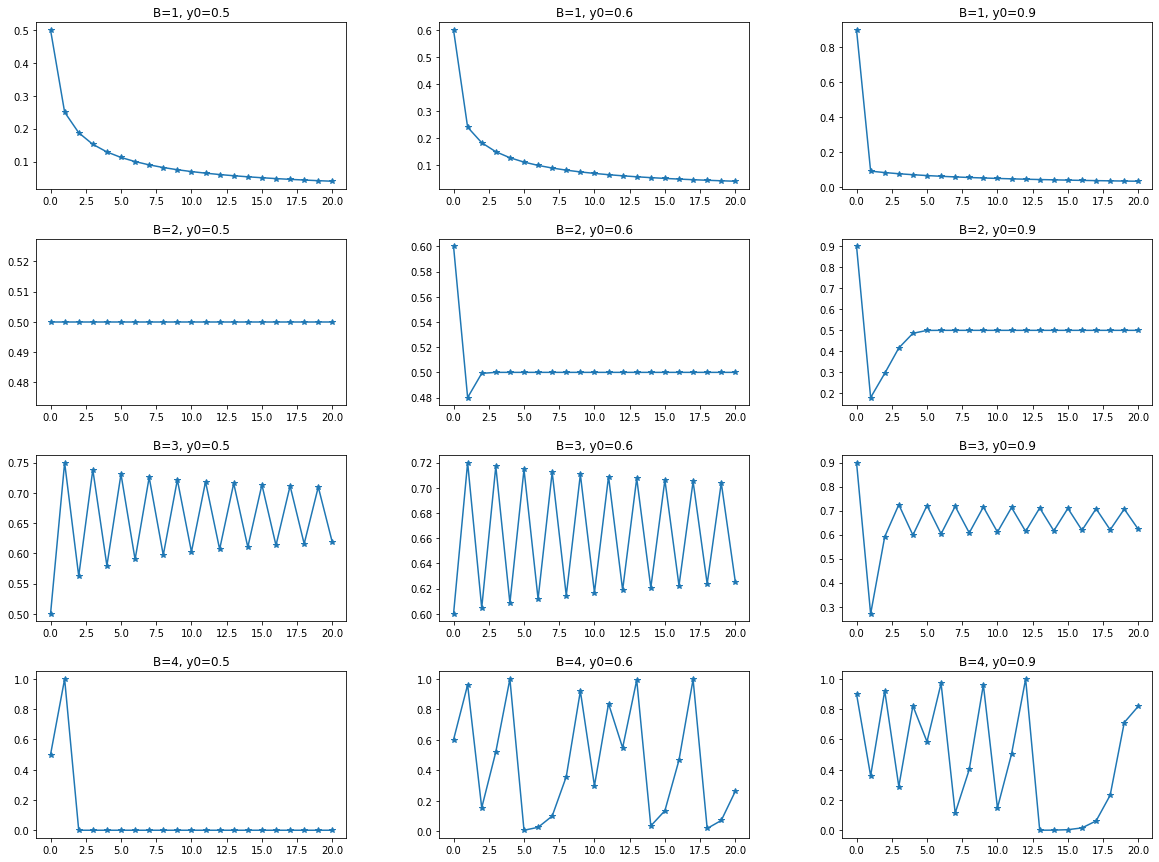

In [6]:
import numpy as np
import matplotlib.pyplot as plt


blist = [1,2,3,4]                       # list of different b values from 1 to 4
ylist = [0.5,0.6,0.9]                   # list of different initial y0 values
k=20                                    # using k=20 days
x = range(0,k+1)                        # range of x values to plot from 0 to k+1
plt.figure(figsize = (20,15))
plt.subplots_adjust(wspace=0.3,hspace=0.3)
i=1
for b in blist:                         # iterate through blist values
    for y in ylist:                     # iterate through blist values
        mayfly_data(b,y,k)              # compute mayfly                    
        plt.subplot(4,3,i)              # plot in 4x3 subplots
        plt.plot(x,mayfly_data(b,y,k),'*-' )    #plotting x (k days) vs. list of y0 values for b
        plt.title(f'B={b}, y0={y}')
        i+=1
plt.show()

Let us try this again with the same values of $b$ and $y_0$ but instead change the amount of time k to a higher value.

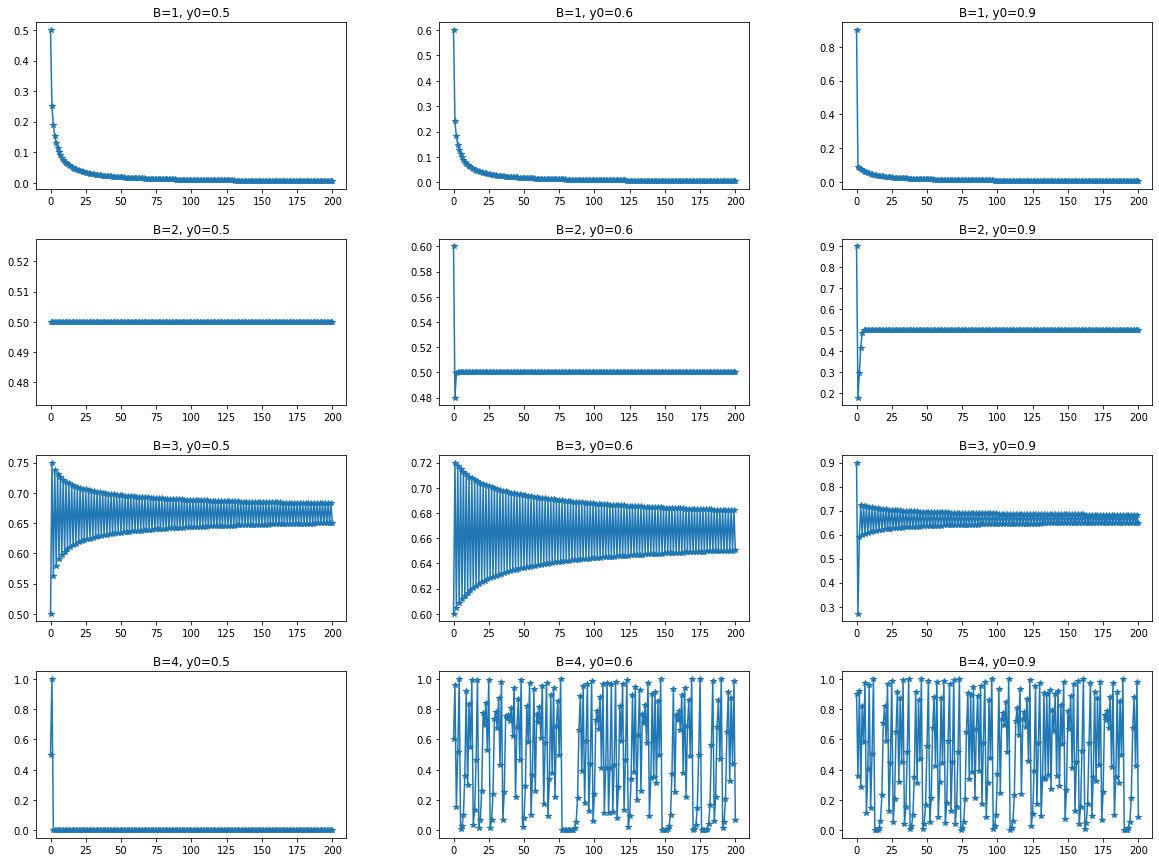

In [7]:
blist = [1,2,3,4]                       # list of different b values from 1 to 4
ylist = [0.5,0.6,0.9]                   # list of different initial y0 values
k=200                                   # using k=200 days
x = range(0,k+1)                        # range of x values to plot from 0 to k+1
plt.figure(figsize = (20,15))
plt.subplots_adjust(wspace=0.3,hspace=0.3)
i=1
for b in blist:                         # iterate through blist values
    for y in ylist:                     # iterate through blist values
        mayfly_data(b,y,k)              # compute mayfly                    
        plt.subplot(4,3,i)              # plot in 4x3 subplots
        plt.plot(x,mayfly_data(b,y,k),'*-' )    #plotting x (k days) vs. list of y0 values for b
        plt.title(f'B={b}, y0={y}')
        i+=1
plt.show()

## Improved Graphs

A better visualization would be one that focuses on the values of $b$ and  $y_0$. These two variables, especially $b$, are significant in changing how the population values change. 

In [8]:
def b_plot(b_s,b_e,b_n,y0,k):               # function that creates plot of b vs. y0
    blist =np.linspace(b_s,b_e,b_n)         # blist is b values from b_s to b_e with b_n equally spaced values inbetween
    plt.figure(figsize=(10,8))
    plt.title('$b$ vs $y_0$')
    plt.xlabel('$b$')
    plt.ylabel('$y_0$')
    for i in blist:                         # iterate through values in blist
        x= i*np.ones(k+1)   # need the same set of x values for each new y0 value,this will create array of 1s in range of k+1 
                            # times value of b. So we end up with a k-length list of b's that are all the same for each set of y0
        y = mayfly_data(i,y0,k)
        plt.plot(x,y,'k.',linewidth=.2, alpha=0.05)
    plt.show()

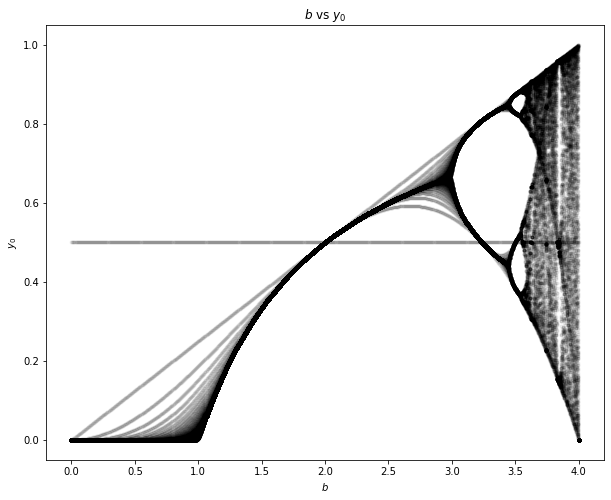

In [9]:
b_plot(0,4,1000,0.5,200)

The result from plotting different values of $b$ against their respective $y_0$ values is very interesting. The population continues to grow at higher values of $b$ until we reach the $b=3$ mark. After that the population begins to split, oscillating between roughly two values of $y_0$. As we go even higher in $b$, the population begins to split into even more branches, going from 2 branches to 4 branches, where values continue to oscillate between the same general points. The result is fairly chaotic.

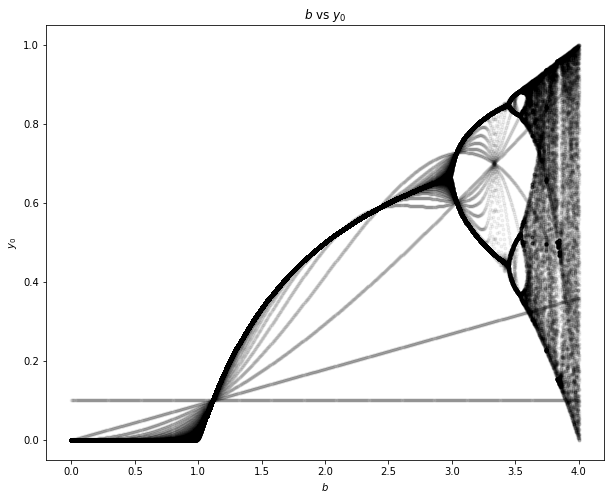

In [10]:
b_plot(0,4,1000,0.1,200)        # y0 =0.1

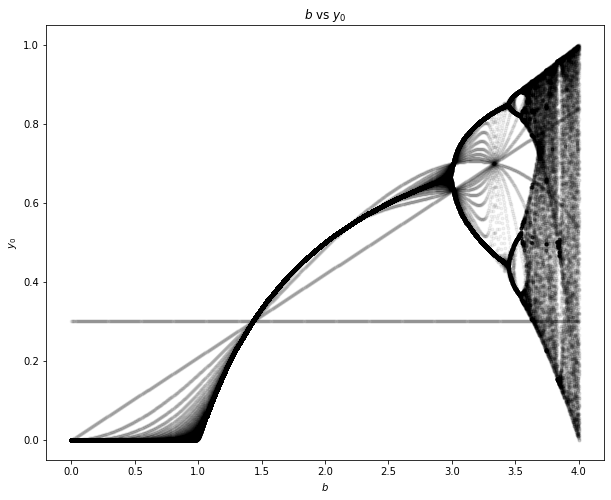

In [11]:
b_plot(0,4,1000,0.3,200)        # y0 =0.3

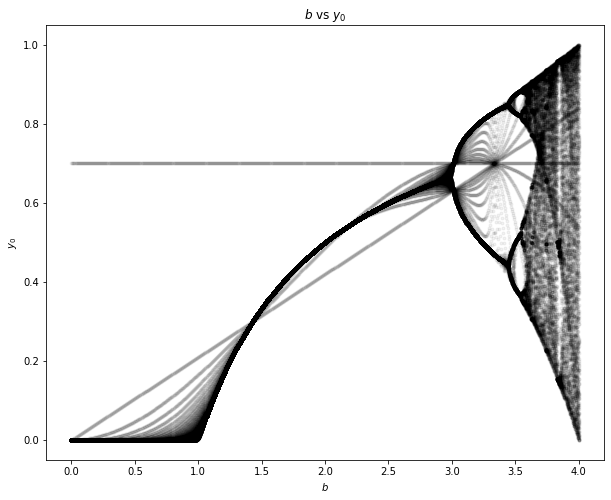

In [12]:
b_plot(0,4,1000,0.7,200)        # y0 =0.7

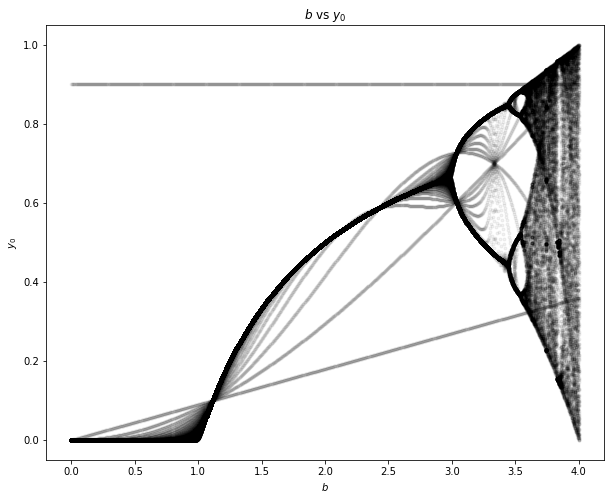

In [14]:
b_plot(0,4,1000,0.9,200)        # y0 =0.9

Focus on values of $b$ between 3 and 4, to see if we can get a better understanding of what is going on with those higher values.

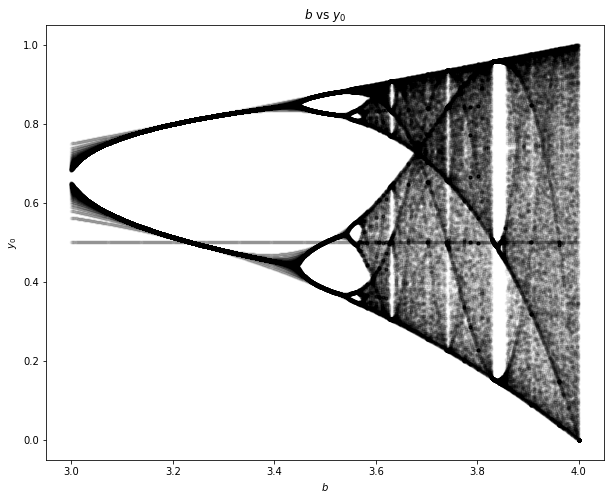

In [13]:
b_plot(3,4,1000,0.5,200)       

## Resources

Mayfly Information : https://en.wikipedia.org/wiki/Mayfly#Reproduction_and_life_cycle

Population Model : https://en.wikipedia.org/wiki/Population_model

Documentation : https://scassani.github.io/MTH337-F20/Projects/mayfly_model/mayfly_model.html

Code help from MTH 337